# Implementation of Polynomial regression:

IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

UPLOAD TRAIN AND TEST DATASET AND PRINT

In [2]:
train_df=pd.read_csv('C:/Users/adity/OneDrive/Desktop/WOC4.0/Linear and polynomial regression/Polynomial_train.csv')
test_df=pd.read_csv('C:/Users/adity/OneDrive/Desktop/WOC4.0/Linear and polynomial regression/Polynomial_test.csv')

In [3]:
train_df.head()

,X,Y,Z,label
0,0.643715,-9.866550,-5.836019,307.972927
1,-1.366446,-3.761945,-8.756162,136.398375
2,-4.090270,-1.836218,-1.846066,-310.724813
3,-8.730478,-1.923651,3.892972,1.755447
4,5.367169,0.358357,6.703989,-343.582590


In [4]:
train_df.head()

,X,Y,Z,label
0,0.643715,-9.866550,-5.836019,307.972927
1,-1.366446,-3.761945,-8.756162,136.398375
2,-4.090270,-1.836218,-1.846066,-310.724813
3,-8.730478,-1.923651,3.892972,1.755447
4,5.367169,0.358357,6.703989,-343.582590


In [5]:
train_df.shape          # print shape(no.of rows, no. of columns) of train dataframe.

(50000, 4)

In [6]:
test_df.shape          # print shape(no.of rows, no. of columns) of test dataframe.

(10000, 4)

In [7]:
# take features from train and test dataframe respectively.
features_train = train_df.iloc[:,:3]
features_test = test_df.iloc[:,:3]

In [8]:
# take actual output from train and test data and convert into numpy array.
Y_train = np.array(train_df.iloc[:, 3])
Y_test = np.array(test_df.iloc[:, 3])

In [9]:
# features scaling using mean and standard deviation of training features.
u = features_train.mean()            
si = features_train.std()
train_df = (features_train - u)/si

In [10]:
# features scaling using mean and standard deviation of testing features.
u1 = features_test.mean()
si1 = features_test.std()
test_df = (features_test - u1)/si1

In [11]:
# separte features of training data.
X = features_train.loc[:,'X']
Y = features_train.loc[:,'Y']
Z = features_train.loc[:,'Z']

In [12]:
# separte features of testing data.
X1 = features_test.loc[:,'X']
Y1 = features_test.loc[:,'Y']
Z1 = features_test.loc[:,'Z']

In [13]:
# create new different array using training features.
P = np.square(X)
Q = np.square(Y)
R = np.square(Z)
S = np.array(X*Y)
T = np.array(Y*Z)
U = np.array(Z*X)

In [14]:
# create new different array using testing features.
P1 = np.square(X1)
Q1 = np.square(Y1)
R1 = np.square(Z1)
S1 = np.array(X1*Y1)
T1 = np.array(Y1*Z1)
U1 = np.array(Z1*X1)

ADD NEW FEATURES IN TRAINING AND TESTING FEATURES DATA.

In [15]:
# create features and features1 array.
features = np.ones((50000,10)) 
features1 = np.ones((10000,10)) 

In [16]:
features

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [17]:
features[:,0] = np.ones((50000,))  # add columns of ones.
features[:,1] = X                  # add given training features X.
features[:,2] = Y                  # add given training features Y.
features[:,3] = Z                  # add given training features Z.
features[:,4] = P                  # add given training features square of X.
features[:,5] = Q                  # add given training features square of Y.
features[:,6] = R                  # add given training features square of Z.
features[:,7] = S                  # add given training features element multiplycation of X and Y.
features[:,8] = T                  # add given training features element multiplycation of Y and Z.
features[:,9] = U                  # add given training features element multiplycation of Z and X.

In [18]:
features1[:,0] = np.ones((10000,)) # add columns of ones.
features1[:,1] = X1                # add given testing features X.
features1[:,2] = Y1                # add given testing features Y.
features1[:,3] = Z1                # add given testing features Z.
features1[:,4] = P1                # add given testing features square of X.
features1[:,5] = Q1                # add given testing features square of Y.
features1[:,6] = R1                # add given testing features square of Z.
features1[:,7] = S1                # add given testing testing features element multiplycation of X and Y.
features1[:,8] = T1                # add given testing features element multiplycation of Y and Z.
features1[:,9] = U1                # add given testing features element multiplycation of Z and X.

In [19]:
features               # print training features.

array([[  1.        ,   0.64371517,  -9.86655011, ...,  -6.35124797,
         57.58137788,  -3.75673422],
       [  1.        ,  -1.36644585,  -3.76194541, ...,   5.14049469,
         32.94020319,  11.96482113],
       [  1.        ,  -4.09026967,  -1.83621751, ...,   7.51062479,
          3.38977801,   7.55090619],
       ...,
       [  1.        ,   6.6167532 ,  -2.84728822, ..., -18.83980346,
          1.4351472 ,  -3.33510838],
       [  1.        ,   3.55819907,   4.50752592, ...,  16.03867453,
        -21.74283426, -17.16359126],
       [  1.        ,   0.62343079,   8.86323404, ...,   5.52561302,
        -28.63746107,  -2.01432964]])

In [20]:
Y_train              # print actual output of training data.

array([ 307.9729269,  136.3983754, -310.7248135, ...,  663.8736555,
       -421.0040045, -699.7186817])

COMUPTE COST FUNCTION

In [21]:
# Declare cost function.
def compute_cost(X, Y, theta):
    m = len(X)                   # m is the total no. of items.
   
    
    y_pred = (X @ (theta.T))     # y_pred is matrix multiplycation of X and theta.
    
    cost = (1/2*m)*(np.sum(np.square(y_pred - Y)))         # this is the expression for the cost function.
    
    
    return cost                   # return value is cost.

In [22]:
compute_cost(features, Y_train, np.zeros(features.shape[1],))          # initial cost value.

1817651398031462.8

In [23]:
# Declare Gradient Descent function.
def gradient_descent(X, Y, learning_rate, iteration):
    m = Y.size                                    # m is the total no. of items.
    theta = np.zeros(X.shape[1],)                 # create theta as a numpy array of dimension (X.shape[1], 1) and assign zero.
    cost_list = []                                # create cost_list as a list for storing cost value of each iteration.
    
# loop for predicting y_pred(hypothesis function), update theta, cost on updated theta and store cost into cost_list.    
    for i in range(iteration):
        
        y_pred = np.dot(X, theta)
       
        cost = compute_cost(X, Y, theta)
    
        d_theta = (1/m)*(np.dot(X.T, y_pred - Y))
    
        theta = theta - learning_rate*d_theta
         
        cost_list.append(cost)
        
        
    return theta, cost_list                  # return value is theta and cost_list.

In [24]:
iteration = 1000                            # no.of iterations.
# Call the gradient_descent function for training data by input as X_train(features), Y_train(actual output), alpha, iteration.
theta, cost_list = gradient_descent(features, Y_train, 0.00003, 1000)

PLOT THE CURVE COST VS ITERATION

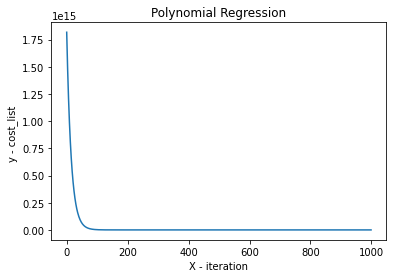

In [25]:
rng = np.arange(iteration)
plt.plot(rng, cost_list)
plt.xlabel('X - iteration')
plt.ylabel('y - cost_list ')
plt.title('Polynomial Regression')
plt.show()

TESTED ON TESTING DATA

In [26]:
Y_test_pred = np.dot(features1, theta)    # predict output for testing data using its features and updated theta.

In [27]:
RMSE = np.sqrt(np.mean((Y_test_pred - Y_test)**2))  """ calculate RMSE and print for predicted how concentrated the 
                                                                 data is around the line of best fit."""
RMSE

1.5954591786481884